In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima import auto_arima

# Fetch Tesla stock data


In [ ]:
tsla_data = yf.download('TSLA', start='2015-01-01', end='2023-01-01')
tsla_data = tsla_data['Close']


train_size = int(len(tsla_data) * 0.8)
train, test = tsla_data[:train_size], tsla_data[train_size:]

model = auto_arima(train, seasonal=False, stepwise=True, trace=True)

# Forecast for the next 12 months (about 252 trading days)
n_periods = 252  # Approximate number of trading days in 12 months
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8340.014, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8331.877, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8331.767, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8340.213, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8333.757, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8333.735, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8335.392, Time=0.62 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8332.366, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.372 seconds


c:\Users\ASUS VIVO\.conda\envs\me\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ASUS VIVO\.conda\envs\me\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


we need to create data range

In [ ]:

forecast_index = pd.date_range(start=tsla_data.index[-1] + pd.Timedelta(days=1), 
                                periods=n_periods, freq='B')  

# Create a forecast series
forecast_series = pd.Series(forecast, index=forecast_index)

visualize the forecat

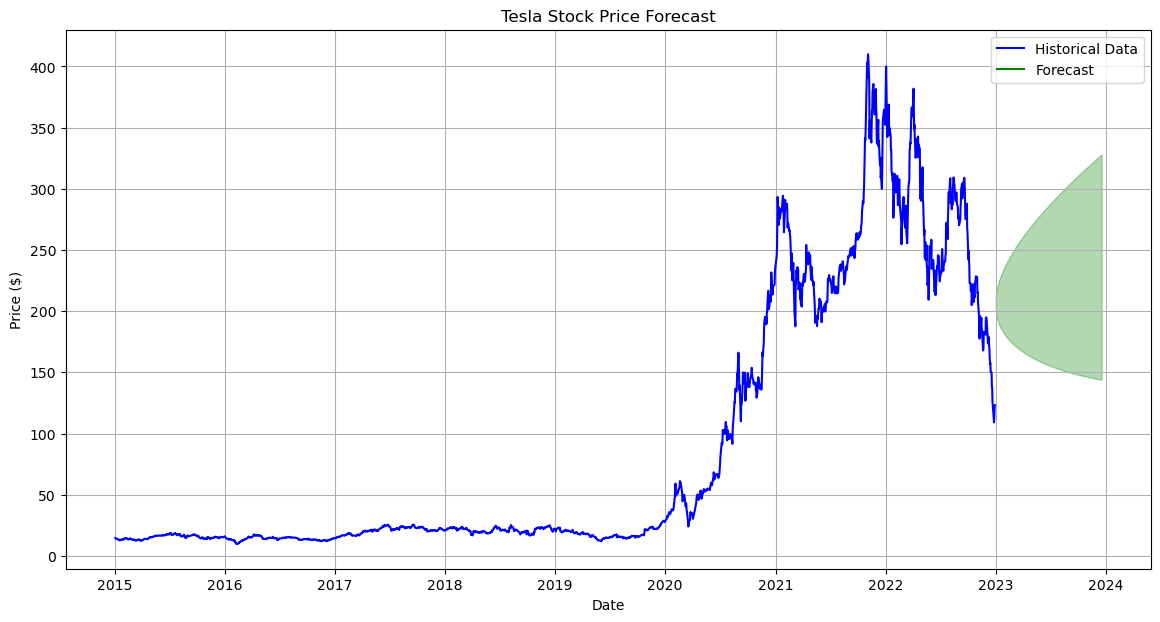

In [ ]:

plt.figure(figsize=(14, 7))
plt.plot(tsla_data, label='Historical Data', color='blue')
plt.plot(forecast_series, label='Forecast', color='green')

# Plot confidence intervals
plt.fill_between(forecast_series.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='green', alpha=0.3)

plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()